In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import torch
import torchvision
from torch.utils.data import DataLoader
from torchvision import transforms, datasets


### Step 1: Data processing

In [4]:
train = datasets.MNIST("", train=True, download=True,
                      transform=transforms.Compose([transforms.ToTensor()]))
test = datasets.MNIST("", train=False, download=True,
                      transform=transforms.Compose([transforms.ToTensor()]))

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [5]:
trainset = torch.utils.data.DataLoader(train, batch_size=15, shuffle=True)
testset = torch.utils.data.DataLoader(train, batch_size=15, shuffle=True)

In [6]:
for data in trainset:
    data
#     print(data)
    break

In [7]:
# Note that the randomly shuffled "data" is in the form of list with 2 elements where each element is a tensor
len(data)

2

In [8]:
data[0][0];


In [9]:
data[0].shape, data[0][0].shape

(torch.Size([15, 1, 28, 28]), torch.Size([1, 28, 28]))

In [10]:
print(data[1])
print(data[1][0])
data[1].shape, data[1][0].shape

tensor([3, 0, 3, 3, 0, 5, 0, 0, 6, 3, 8, 1, 8, 4, 3])
tensor(3)


(torch.Size([15]), torch.Size([]))

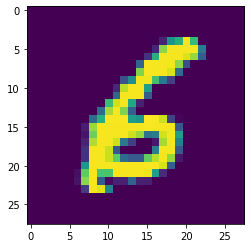

In [11]:
# see the data. Note the view command below. it is similar to reshape
import matplotlib.pyplot as plt

plt.imshow(data[0][8].view(28,28))
plt.show()

In [12]:
# reshape the data
data[0].shape

torch.Size([15, 1, 28, 28])

Next we check how many of each digits in the train set

In [13]:
def digit_counter(trainset = trainset):
    total = 0
    counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}
    for data in trainset:
        x_data, y_data = data
        for y in y_data:
            counter_dict[int(y)] += 1
            total += 1
    print("The number of each digits in train set ", counter_dict, "\n")
    print("The total number of digits in train set ", total, "\n")
    counter_dict_percentage = counter_dict
    for j in counter_dict_percentage:
        counter_dict_percentage[j] = (counter_dict_percentage[j]/total)*100
        counter_dict_percentage[j] = round(counter_dict_percentage[j], 0)  # upto one significant digit
    counter_dict_percentage
    print("The % of each digits in train set \n")
    return  counter_dict_percentage
digit_counter()

The number of each digits in train set  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949} 

The total number of digits in train set  60000 

The % of each digits in train set 



{0: 10.0,
 1: 11.0,
 2: 10.0,
 3: 10.0,
 4: 10.0,
 5: 9.0,
 6: 10.0,
 7: 10.0,
 8: 10.0,
 9: 10.0}

### Step-2: NN

In [14]:
import torch.nn as nn
import torch.nn.functional as F

In [15]:
class NN(nn.Module):
    def __init__(self, n_input, n_fc1, n_fc2, n_fc3, n_fc4 ):
        super().__init__()
        
        # layer 1
        self.fc1 = nn.Linear(n_input, n_fc1)
                
        # layer 2
        self.fc2 = nn.Linear(n_fc1, n_fc2)
                
        # layer 3
        self.fc3 = nn.Linear(n_fc2, n_fc3)
                
         # layer 4 (output)
        self.fc4= nn.Linear(n_fc3, n_fc4)
                
    def forward(self, X):
        # layer 1
        X = self.fc1(X)
        X = F.relu(X)
        
         # layer 2
        X = self.fc2(X)
        X = F.relu(X)
        
         # layer 3
        X = self.fc3(X)
        X = F.relu(X)
        
         # layer 4
        X = self.fc4(X)
        X = F.log_softmax(X, dim=1)
        return X
        
        

In [16]:
model = NN(n_input=28*28, n_fc1=64, n_fc2=50, n_fc3=20, n_fc4=10)
print(model)

NN(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=50, bias=True)
  (fc3): Linear(in_features=50, out_features=20, bias=True)
  (fc4): Linear(in_features=20, out_features=10, bias=True)
)


In [17]:
X = torch.randn((28,28))
X = X.view(-1, 28*28)

In [18]:
yhat = model(X)
yhat

tensor([[-2.3905, -2.3810, -2.4859, -2.3455, -2.2099, -2.0984, -2.1136, -2.4437,
         -2.2871, -2.3503]], grad_fn=<LogSoftmaxBackward>)

### Step-3: Train model

In [19]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [20]:
for epoch in range(3):
    for data in trainset:
        X, y = data
        X = X.view(-1, 28*28)
        # sets gradients = 0 before loss calc. You will do this likely every step.
        model.zero_grad()
        yhat = model(X)
        loss = F.nll_loss(yhat, y)
    #     print(loss)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.7344, grad_fn=<NllLossBackward>)
tensor(0.2590, grad_fn=<NllLossBackward>)
tensor(0.0220, grad_fn=<NllLossBackward>)


Check the dimensions:

In [21]:
print(X.shape)
print(y.shape)
print(yhat.shape)

torch.Size([15, 784])
torch.Size([15])
torch.Size([15, 10])


In [28]:
correct = 0
total = 0 

with torch.no_grad():
    for idx, i in enumerate(yhat):
        if torch.argmax(i) == y[idx]:
            correct += 1
        total += 1
acc = (correct/total) *100
print("Accuracy is ", acc)
        

Accuracy is  100.0


* Check how acurate is our model in real sense

In [35]:
X.shape

torch.Size([15, 784])

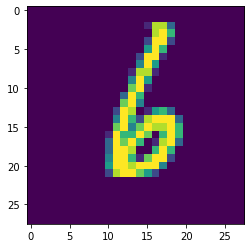

In [36]:
import matplotlib.pyplot as plt
plt.imshow(X[0].view(28,28))
plt.show()

In [38]:
torch.argmax(yhat[0])

tensor([ -3.1606,  -4.0446,  -3.8586,  -8.2524,  -2.5267,  -5.6209,  -0.1803,
        -27.9875,  -8.8060, -11.3941], grad_fn=<SelectBackward>)

In [27]:
# idx is basicaaly the first argument in the itensor 
# argmax -> indices correspondiong to the max value along a particular direction (dims)

for idx, i in enumerate(yhat):
        # print(torch.argmax(i), y[idx])
        # print(torch.argmax(i),i, "\n", y[idx], "\n")
#         if torch.argmax(i) == y[idx]:
#             correct += 1
#         total += 1

tensor(6, grad_fn=<NotImplemented>) tensor([ -3.1606,  -4.0446,  -3.8586,  -8.2524,  -2.5267,  -5.6209,  -0.1803,
        -27.9875,  -8.8060, -11.3941], grad_fn=<SelectBackward>) 
 tensor(6) 

tensor(2, grad_fn=<NotImplemented>) tensor([ -51.1431,  -37.2231,    0.0000,  -35.9422,  -43.3590,  -68.8526,
         -61.0899, -111.7705,  -63.7852, -140.4282], grad_fn=<SelectBackward>) 
 tensor(2) 

tensor(7, grad_fn=<NotImplemented>) tensor([-3.4577e+01, -2.2762e+01, -2.6146e+01, -2.3206e+01, -3.6024e+01,
        -2.4605e+01, -5.8077e+01, -1.1921e-07, -3.9013e+01, -1.5908e+01],
       grad_fn=<SelectBackward>) 
 tensor(7) 

tensor(5, grad_fn=<NotImplemented>) tensor([-1.0820e+01, -1.7584e+01, -1.2208e+01, -7.7937e+00, -1.6893e+01,
        -7.7909e-04, -1.0596e+01, -1.5557e+01, -8.4250e+00, -9.2417e+00],
       grad_fn=<SelectBackward>) 
 tensor(5) 

tensor(8, grad_fn=<NotImplemented>) tensor([-1.3683e+01, -9.3415e+00, -1.7309e+01, -1.2978e+01, -1.7405e+01,
        -1.3190e+01, -1.5887e+01, -

In [24]:
torch.manual_seed(42)
n = torch.randn(3,5)
print(n)
# with torch.no_grad():
for idx, i in enumerate(n):
    # print(idx, i, "\n")
    print(torch.argmax(i))
    
#     break

tensor([[ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229],
        [-0.1863,  2.2082, -0.6380,  0.4617,  0.2674],
        [ 0.5349,  0.8094,  1.1103, -1.6898, -0.9890]])
tensor(0)
tensor(1)
tensor(2)


In [25]:
for x in range(10):
    print(x)
    break

0


In [26]:
x

0